# PROJETO DE CIÊNCIA DE DADOS - DAVI FELYPE

---


# DATA SCIENCE ACADEMY
# Fundamentos de linguagem python - Do básico a aplicação de IA.
# Mini-Projeto 1
# Análise de vendas para loja de Ecommerce com NumPy, Pandas e Matplotlib.


# 1. Definição do problema de negócio

**1.1. O Problema de Negócio**

Nossa loja de e-commerce está em fase de crescimento, registrando um volume cada vez maior de transações diárias. No entanto, essa grande quantidade de dados de vendas, em seu estado bruto, é como um baú de tesouro trancado: sabemos que há valor ali, mas não conseguimos acessá-lo.

Atualmente, muitas de nossas decisões estratégicas são baseadas em intuição e observações parciais, o que nos leva a enfrentar os seguintes desafios:

- Gestão de Estoque Ineficiente: Não temos clareza sobre quais produtos são nossos "campeões de venda" e quais estão parados nas prateleiras. Isso resulta em excesso de estoque de itens de baixa procura e falta de produtos de alta demanda.

- Marketing com Baixo Retorno: Nossas campanhas de marketing são genéricas, pois não sabemos quais categorias de produtos atraem mais os clientes ou em quais regiões geográficas nosso público está mais concentrado.

- Perda de Oportunidades Sazonais: Não conseguimos identificar padrões ou tendências de vendas ao longo dos meses. Isso nos impede de planejar promoções estratégicas para períodos de alta ou de criar ações para impulsionar as vendas em meses de baixa.

- Expansão sem Direção: Temos o desejo de expandir, mas não sabemos quais mercados regionais são mais promissores ou onde nossos esforços logísticos deveriam ser focados.

O problema central é a falta de visibilidade clara sobre a performance do negócio, o que nos impede de tomar decisões rápidas, inteligentes e baseadas em evidências.

**1.2. Objetivos do Projeto**

Este projeto de análise de dados visa transformar nossos dados brutos de vendas em insights acionáveis. O objetivo é responder a quatro perguntas de negócio fundamentais:

- O que vender? Identificar os produtos de maior sucesso para otimizar nosso portfólio e estoque.
<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
- Onde focar? Compreender quais categorias de produtos geram a maior parte da nossa receita.

- Quando agir? Analisar a performance de vendas ao longo do tempo para identificar tendências, picos e sazonalidades.

- Para onde expandir? Mapear a distribuição geográfica de nossas vendas para descobrir nossos mercados mais fortes.

**1.3. Solução Proposta**

A solução consiste em consolidar, limpar e analisar o histórico de dados de vendas da nossa plataforma. Utilizando ferramentas de análise de dados (como Python com Pandas, NumPy e Matplotlib), vamos processar essas informações e criar um relatório visual que apresente as descobertas de forma clara e intuitiva para as equipes de gestão, marketing e operações.

**1.4. Resultados Esperados e Benefícios de Negócio**

Ao final deste projeto, esperamos alcançar os seguintes resultados:

- Otimização de Estoque: Com a lista dos produtos mais e menos vendidos, poderemos ajustar nossas compras, reduzir custos com armazenamento e evitar a perda de vendas por falta de produto.

- Marketing Direcionado e Eficaz: Sabendo quais categorias e regiões são mais lucrativas, a equipe de marketing poderá criar campanhas segmentadas, aumentando o retorno sobre o investimento (ROI).

- Planejamento Estratégico: A visualização das tendências mensais permitirá um melhor planejamento financeiro, promocional e de recursos, antecipando períodos de alta e baixa demanda.

- Decisões Baseadas em Dados: Substituiremos a intuição por dados concretos, criando uma cultura orientada a dados que impulsionará o crescimento sustentável do negócio.

#2. Importação das biblotecas

In [ ]:

!pip install -q -U watermark

In [ ]:
# Importando das classes datetime e timedelta para manipulação de datas e intervalos de tempos
from datetime import datetime, timedelta

# Importando a bibloteca Pandas para manipulação de dados em tabelas
import pandas as pd

# Importando a bibloteca NumPy para operações matemáticas e array
import numpy as np

# Importando a bibloteca Matplotlib para geração de gráficos
import matplotlib.pyplot as plt

# Importando a bibloteca Seaborn para visualização de estáticas de dados
import seaborn as sns

# Importando a bibloteca Random para geração de números aleatórios
import random


# Comando que permite exibir gráficos diretamente do Jupyter Notebook
%matplotlib inline

In [ ]:
%reload_ext watermark
%watermark -a "Davi Felype Costa Silva"

Author: Davi Felype Costa Silva



In [ ]:
%watermark --iversions

seaborn   : 0.13.2
numpy     : 2.0.2
pandas    : 2.2.2
matplotlib: 3.10.0



# 3. Geração de dados fictícios

In [ ]:
# Função para geração de dados
def dataGeneration (register_number = 1000):
  """
   Gera um dataframe do pandas com dados de vendas fictícios.
  """
  # Importando das classes datetime e timedelta para manipulação de datas e intervalos de tempos
  from datetime import datetime, timedelta

  print(f"\n Inicialização a geração de {register_number} registros de vendas...")

# Nosso dicionário de produtos, aonde armazena seu nome, categoria e preço
  products = {
      'Moedor de café': {'categoria':'Eletrodoméstico', 'preço': 70.00},
      'Espeto de Jardim' : {'categoria':'Iluminação', 'preço': 12.00},
      'Refletor 100w' : {'categoria':'Iluminação', 'preço' : 40.00},
      'Refletor 30w' : {'categoria':'Iluminação', 'preço' : 20.00},
      'Pisca-Natal' : {'categoria': 'Decoração', 'preço' : 50.00},
      'Kit 10 Espetos' : {'categoria': 'Iluminação', 'preço' : 100.00},
      'Boobie Goods' : {'categoria': 'Brinquedos', 'preço' : 55.00},
      'Canetinhas' : {'categoria' : 'Brinquedos', 'preço' : 37.00}
  }

# Uma lista que armazena o nome dos produtos
  productsList = list(products.keys())

# Um dicionário que armazena a cidade e o estado do comprador
  stateCity = {
      'Sertãozinho' : 'SP', 'Ribeirão Preto' : 'SP', 'Passos' : 'MG',
      'Blumenau' : 'SC', 'Xique-xique' : 'BA', 'Hidrolandia' : 'CE',
  }

# Uma lista com o nome das cidades
  cityList = list(stateCity.keys())

# Um liste a qual será armazena os dados das vendas
  salesData = []

# Data inicial
  starTime = datetime(2026, 1 , 1)

# Nosso laço de repetição que vai gerar todos os dados de acordo com a quantidade dada como paramêtro para a função
  for i in range(register_number):

    # Escolhe randomicamente um nome da lista de produtos
    productName = random.choice(productsList)

    # Escolhe randomicamente um nome da lista de cidades
    cityName = random.choice(cityList)

    # Gera randomicamente uma quantidade aleatória dada como parametro pela função e armazena na quantidade
    amount = np.random.randint (1, 8)

    # Gera um dia de pedido aleatório
    orderDate = starTime + timedelta(days = int (i/5), hours = random.randint(0, 23))

    # Nossa condição encontra os produtos indicados, pelo paramêtro, e aplica um desconto em sua unidade
    if productName in ['Bobbie Goods', 'Canetinhas']:
      unitPrice = products [productName]['preço'] * np.random.uniform (0.9, 1.0)
    else:
      unitPrice = products [productName]['preço']

    # Após todo script é adicionado esses dados a nossa lista salesData que representa os dados da venda
    salesData.append ({
        'idOrder': 1000 + i,
        'orderDate' : orderDate,
        'product' : productName,
        'category' : products[productName]['categoria'],
        'unitPrice' : round(unitPrice, 2),
        'amount' : amount,
        'idCustomer' : np.random.randint (100, 150),
        'city' : cityName,
        'State' : stateCity [cityName]
    })

  print("Geração de dados concluída.\n")
  return pd.DataFrame(salesData)

# 4. Gerar, carregar e explorar

In [ ]:
# Gera e armazena nosso dataframe de vendas
dfSales = dataGeneration (1000)


 Inicialização a geração de 1000 registros de vendas...
Geração de dados concluída.



In [ ]:
# Verifica se foi gerado tudo corretamente
dfSales.shape

(1000, 9)

In [ ]:
# Exibe as primeiras 5 linhas do nosso dataframe
dfSales.head ()

,idOrder,orderDate,product,category,unitPrice,amount,idCustomer,city,State
0,1000,2026-01-01 13:00:00,Pisca-Natal,Decoração,50.00,4,116,Blumenau,SC
1,1001,2026-01-01 05:00:00,Pisca-Natal,Decoração,50.00,4,117,Blumenau,SC
2,1002,2026-01-01 15:00:00,Kit 10 Espetos,Iluminação,100.00,3,136,Blumenau,SC
3,1003,2026-01-01 05:00:00,Canetinhas,Brinquedos,34.53,2,125,Xique-xique,BA
4,1004,2026-01-01 03:00:00,Refletor 100w,Iluminação,40.00,1,138,Sertãozinho,SP


In [ ]:
# Exibe as 5 últimas linhas do nosso dataframe
dfSales.tail ()

,idOrder,orderDate,product,category,unitPrice,amount,idCustomer,city,State
995,1995,2026-07-19 05:00:00,Kit 10 Espetos,Iluminação,100.0,4,131,Hidrolandia,CE
996,1996,2026-07-19 13:00:00,Pisca-Natal,Decoração,50.0,6,142,Blumenau,SC
997,1997,2026-07-19 00:00:00,Refletor 30w,Iluminação,20.0,4,132,Ribeirão Preto,SP
998,1998,2026-07-19 13:00:00,Boobie Goods,Brinquedos,55.0,5,146,Xique-xique,BA
999,1999,2026-07-19 02:00:00,Espeto de Jardim,Iluminação,12.0,2,125,Passos,MG


In [ ]:
# Exibe se existe algum problema em nossos dados, e seus tipos
dfSales.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   idOrder     1000 non-null   int64         
 1   orderDate   1000 non-null   datetime64[ns]
 2   product     1000 non-null   object        
 3   category    1000 non-null   object        
 4   unitPrice   1000 non-null   float64       
 5   amount      1000 non-null   int64         
 6   idCustomer  1000 non-null   int64         
 7   city        1000 non-null   object        
 8   State       1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 70.4+ KB


In [ ]:
# Realiza uma breve análise estátistica
dfSales.describe ()

,idOrder,orderDate,unitPrice,amount,idCustomer
count,1000.000000,1000,1000.00000,1000.000000,1000.000000
mean,1499.500000,2026-04-10 23:50:56.400000,48.45582,4.000000,124.691000
min,1000.000000,2026-01-01 03:00:00,12.00000,1.000000,100.000000
25%,1249.750000,2026-02-20 05:00:00,33.69750,2.000000,112.000000
50%,1499.500000,2026-04-11 00:30:00,50.00000,4.000000,125.000000
75%,1749.250000,2026-05-30 20:45:00,70.00000,6.000000,137.000000
max,1999.000000,2026-07-19 13:00:00,100.00000,7.000000,149.000000
std,288.819436,NaN,26.20377,1.996493,14.463773


# 5. Limpeza, pré-processamento e Engenharia de atributos

In [ ]:
# Se a coluna 'orderDate' não estiver formatada em datetime, precisamos fazer a conversão
# A coluna em específico será usada para uma a análise temporal, por isso precisamos garantir que elas esteja corretamente formatada
dfSales['orderDate'] = pd.to_datetime(dfSales['orderDate'])

In [ ]:
# Engenharia de atributos
# Criamos uma nova coluna, que nos traz o faturamento total de cada venda (Preço x Unidade)
dfSales['billing'] =  dfSales['unitPrice'] * dfSales ['amount']

In [ ]:
# Criamos uma nova coluna, que nos traz o status de entrega da venda
dfSales['shippingStatus'] = dfSales['State'].apply(lambda State: 'fast' if State in ('SP', 'MG') else 'Normal')

In [ ]:
dfSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   idOrder         1000 non-null   int64         
 1   orderDate       1000 non-null   datetime64[ns]
 2   product         1000 non-null   object        
 3   category        1000 non-null   object        
 4   unitPrice       1000 non-null   float64       
 5   amount          1000 non-null   int64         
 6   idCustomer      1000 non-null   int64         
 7   city            1000 non-null   object        
 8   State           1000 non-null   object        
 9   billing         1000 non-null   float64       
 10  shippingStatus  1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 86.1+ KB


In [ ]:
dfSales.head()

,idOrder,orderDate,product,category,unitPrice,amount,idCustomer,city,State,billing,shippingStatus
0,1000,2026-01-01 13:00:00,Pisca-Natal,Decoração,50.00,4,116,Blumenau,SC,200.00,Normal
1,1001,2026-01-01 05:00:00,Pisca-Natal,Decoração,50.00,4,117,Blumenau,SC,200.00,Normal
2,1002,2026-01-01 15:00:00,Kit 10 Espetos,Iluminação,100.00,3,136,Blumenau,SC,300.00,Normal
3,1003,2026-01-01 05:00:00,Canetinhas,Brinquedos,34.53,2,125,Xique-xique,BA,69.06,Normal
4,1004,2026-01-01 03:00:00,Refletor 100w,Iluminação,40.00,1,138,Sertãozinho,SP,40.00,fast


# 6. Analise 1 - Top 10 produtos mais vendidos.
Quais são os produtos mais vendidos?

In [ ]:
# Agrupamos por produtos, e aplicamos uma soma das quantidades de cada produto e colocamos os 10 maiores.
top10Products = dfSales.groupby('product')['amount'].sum().sort_values(ascending = False).head(10)

In [ ]:
# Exibir
top10Products

,amount
product,
Boobie Goods,545
Moedor de café,541
Pisca-Natal,505
Refletor 30w,505
Refletor 100w,491
Kit 10 Espetos,478
Espeto de Jardim,475
Canetinhas,460


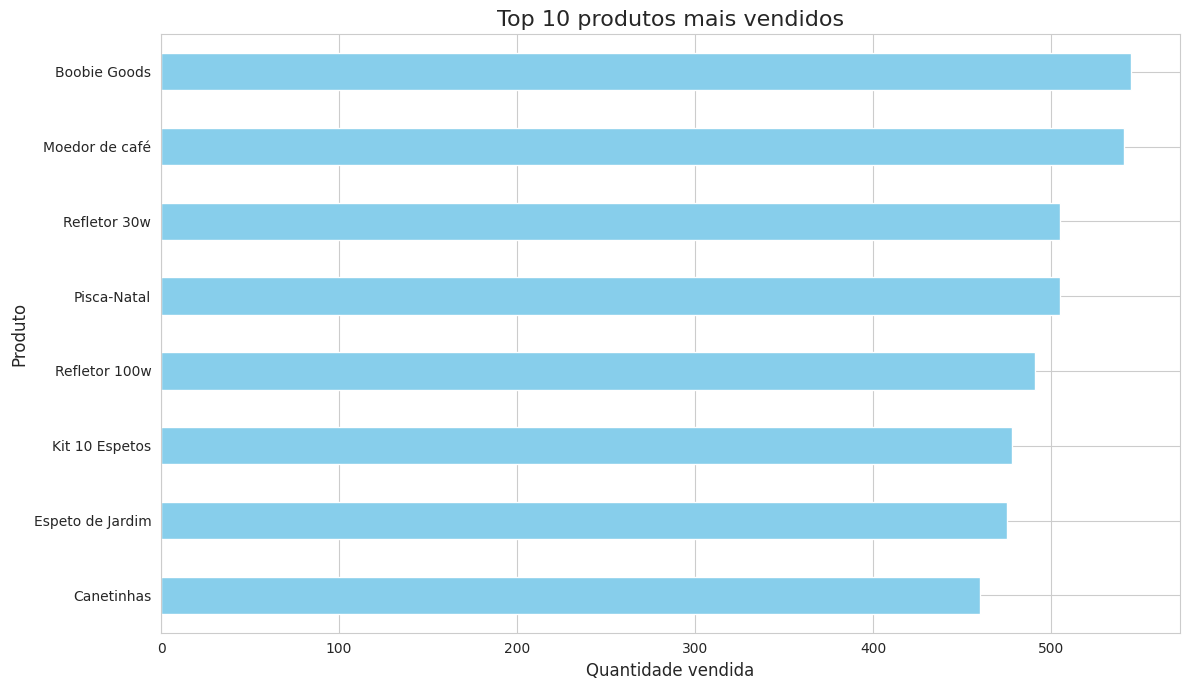

In [ ]:
# Construindo um estilo de grafíco
sns.set_style('whitegrid')

# Cria a figura e seus eixos
plt.figure(figsize = (12, 7))

# Cria um gráfico de barras horizontais
top10Products.sort_values(ascending = True).plot(kind = 'barh', color = 'skyblue')

# Adiciona títulos e labels
plt.title('Top 10 produtos mais vendidos', fontsize = 16)
plt.xlabel('Quantidade vendida', fontsize = 12)
plt.ylabel('Produto', fontsize = 12)


# Exibe o gráfico
plt.tight_layout()
plt.show()

# 7. Análise 2 - Faturamento mensal
Quais foram os faturamentos mensais?

In [ ]:
# Engenharia de Atributos
# Para facilitar, criamos uma nova coluna "month" que guarda as datas agrupadas por mês
dfSales['month'] = dfSales['orderDate'].dt.to_period('M')

In [ ]:
dfSales.head()

,idOrder,orderDate,product,category,unitPrice,amount,idCustomer,city,State,billing,shippingStatus,month
0,1000,2026-01-01 13:00:00,Pisca-Natal,Decoração,50.00,4,116,Blumenau,SC,200.00,Normal,2026-01
1,1001,2026-01-01 05:00:00,Pisca-Natal,Decoração,50.00,4,117,Blumenau,SC,200.00,Normal,2026-01
2,1002,2026-01-01 15:00:00,Kit 10 Espetos,Iluminação,100.00,3,136,Blumenau,SC,300.00,Normal,2026-01
3,1003,2026-01-01 05:00:00,Canetinhas,Brinquedos,34.53,2,125,Xique-xique,BA,69.06,Normal,2026-01
4,1004,2026-01-01 03:00:00,Refletor 100w,Iluminação,40.00,1,138,Sertãozinho,SP,40.00,fast,2026-01


In [ ]:
# Armazenamos o faturamento mensal em uma váriavel que agrupa os meses e faz a soma do faturamento por mês
monthlyBilling = dfSales.groupby('month')['billing'].sum()

In [ ]:
# Convertamos o índice para uma string para facilitar a plotagem do gráfico
monthlyBilling.index = monthlyBilling.index.strftime('%Y-%m')

In [ ]:
# Formata para casas decimais
monthlyBilling.map('R$ {:,.2f}'.format)

,billing
month,
2026-01,"R$ 29,329.65"
2026-02,"R$ 27,386.48"
2026-03,"R$ 29,515.08"
2026-04,"R$ 29,454.97"
2026-05,"R$ 30,857.79"
2026-06,"R$ 27,388.15"
2026-07,"R$ 18,529.29"


<function matplotlib.pyplot.show(close=None, block=None)>

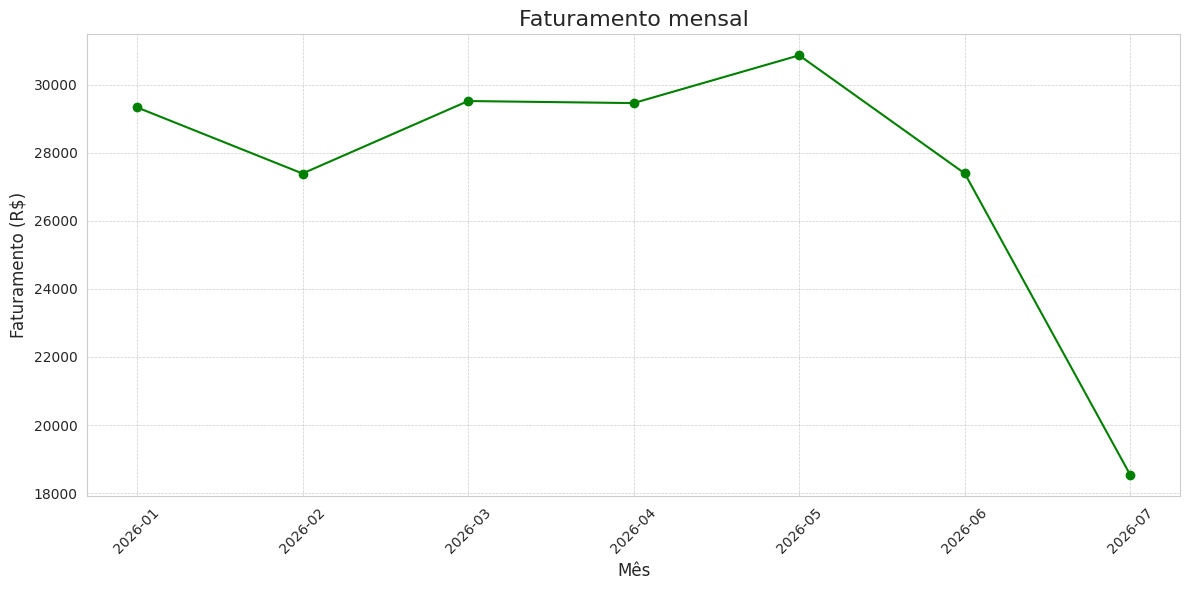

In [ ]:
# Cria uma nova figura com tamanho 12 por 6 polegadas
plt.figure(figsize = (12, 6))

# Plota os dados em formato de linhas
monthlyBilling.plot(kind = 'line', marker = 'o', linestyle = '-', color = 'green')

# Título e labels
plt.title('Faturamento mensal', fontsize = 16)
plt.xlabel('Mês', fontsize = 12)
plt.ylabel('Faturamento (R$)', fontsize = 12)

# Rotaciona os valores do eixo X em 45° graus para melhor visualização
plt.xticks(rotation = 45)

# Adiciona uma grade com estilo personalizado
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

# Ajusta automaticamente para evitar sobreposição
plt.tight_layout()

plt.show

# 8. Análise 3 - Vendas por estado
Qual o total de vendas por estado?

In [ ]:
stateSale = dfSales.groupby('State')['billing'].sum().sort_values(ascending = False)

In [ ]:
stateSale.map("R${:,.2f}".format)

,billing
State,
SP,"R$58,643.83"
SC,"R$36,988.47"
CE,"R$34,105.06"
MG,"R$33,942.99"
BA,"R$28,781.06"


<function matplotlib.pyplot.show(close=None, block=None)>

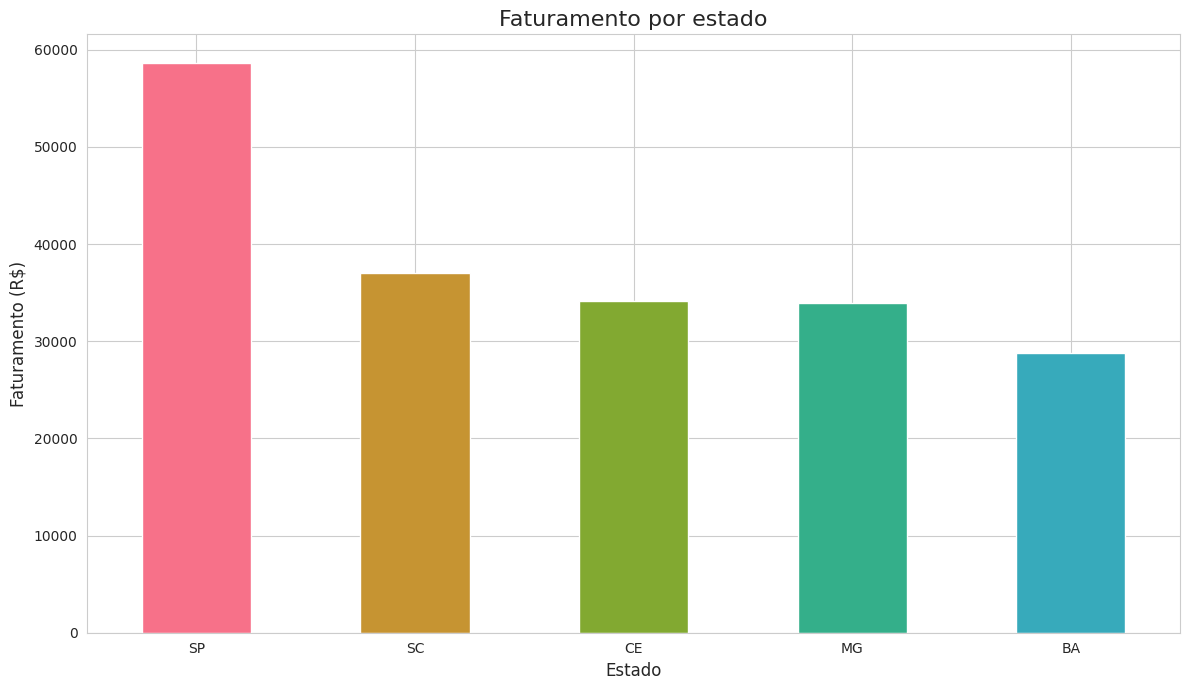

In [ ]:
# Cria uma figura nas dimensões indicadas em polegadas
plt.figure(figsize = (12, 7))

# Cria o estilo de gráfico
stateSale.plot(kind = 'bar', color = sns.color_palette('husl', 7))

# Cria o título principal do gráfico
plt.title ('Faturamento por estado', fontsize = 16)

# Cria as labels de x e y.
plt.xlabel ('Estado', fontsize = 12)
plt.ylabel ('Faturamento (R$)', fontsize = 12)

# Rotaciona a label X
plt.xticks (rotation = 0)

# Ajusta o gráfico na imagem, para evitar sobreposições
plt.tight_layout ()

# Exibe o gráfico
plt.show

# 9. Análise 4 - Vendas por categoria
Quais são as vendas por categoria?

In [ ]:
# Agrupamos na váriavel 'categorySales', as categorias e fazemos a soma total do faturamento para cada uma delas
categorySales = dfSales.groupby('category')['billing'].sum().sort_values(ascending = False)

In [ ]:
# Realizamos uma breve formatação nos seus valores
categorySales.map('R${:,.2f}'.format)

,billing
category,
Iluminação,"R$83,240.00"
Brinquedos,"R$46,101.41"
Eletrodoméstico,"R$37,870.00"
Decoração,"R$25,250.00"


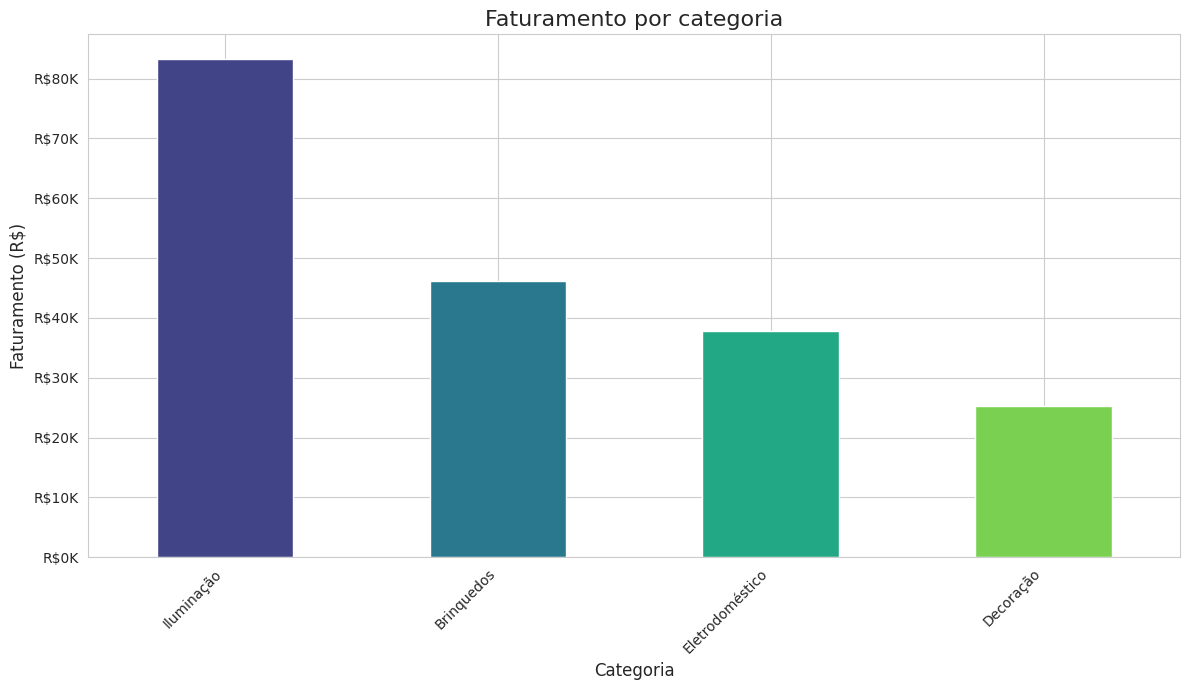

In [ ]:
# Importamos uma função do matplotlib que formata os eixos
from matplotlib.ticker import FuncFormatter

# Ordena os dados para melhor manipulação e entendimento para criação do gráfico
billingOrderer = categorySales.sort_values(ascending= False)

# Cria a figura e os eixos usando a subplots, nos dando mais possibilidades de alteração
fig, ax = plt.subplots (figsize = (12, 7))

# Função de formatação
# Recebe um valor 'y' e tranforma em uma string do formato 'R$ XX K'
def format_m (y, pos):
  return f'R${y/1000:,.0f}K'

# Cria o objeto formatador
formatter = FuncFormatter(format_m)

# Aplica o formatador no eixo  Y (ax.yaxis)
ax.yaxis.set_major_formatter(formatter)

# Plota os dados usando o object 'ax'
billingOrderer.plot(kind = 'bar', ax = ax, color = sns.color_palette('viridis', len(billingOrderer)))

# Set os títulos e as labels
ax.set_title('Faturamento por categoria', fontsize = 16)
ax.set_xlabel('Categoria', fontsize = 12)
ax.set_ylabel('Faturamento (R$)', fontsize = 12)

# Formata a posição do label X
plt.xticks (rotation = 45, ha = 'right')

# Ajusta o gráfico para não ocorrer sobreposições
plt.tight_layout()

# Exibe o gráfico
plt.show()

## 10. Conclusão e Entrega do Resultado

Existem várias formas de entregar um projeto de análise de dados e a escolha depende do público, do contexto e dos objetivos. Três formas bastante utilizadas são:

**10.1. Relatório técnico ou executivo (PDF, DOCX, etc.)**

Essa forma é clássica e muito útil quando o público precisa de um documento formal para consulta. O relatório pode conter descrição da metodologia, exploração dos dados, gráficos, tabelas e conclusões. É comum separar a linguagem: uma versão mais técnica (com código, estatísticas detalhadas e testes) e outra mais executiva (com foco em insights, recomendações e storytelling de dados).

**10.2. Dashboard interativo (Power BI, Tableau, Looker, Streamlit, Dash, etc.)**

Um dashboard permite que os usuários explorem os dados por conta própria, filtrando informações, ajustando períodos de tempo ou focando em variáveis específicas. Essa forma de entrega é muito valorizada em ambientes corporativos, pois facilita a tomada de decisão contínua e não exige conhecimentos técnicos avançados dos usuários finais.

**10.3. Apresentação (slides em PowerPoint, Google Slides, etc.)**

Ideal para reuniões de stakeholders, a entrega em formato de apresentação resume os principais pontos do projeto. Ela foca nas descobertas mais relevantes, nas implicações para o negócio e nas recomendações práticas, usando gráficos e visualizações impactantes. A ideia é contar a história dos dados de forma clara e direta, evitando sobrecarregar o público com detalhes técnicos.

>